<div Style="text-align: center;line-height: 30px;font-size:24px;font-weight: bold"> Data Augmentation</div>
***

In [80]:
%matplotlib inline
import numpy as np
from skimage import io
from skimage.transform import rotate, rescale
import matplotlib.pyplot as plt

# 1. Cambios de tamaño en la imagen

Debemos de tener en cuenta que en todos los cambios que realicemos sobre un imagen, tenemos que tener en cuenta a las coordenadas de las etiquetas realizadas. Por lo tanto, deberemos de cambiar las coordenadas a las correspondientes.

En este caso, debemos de rescalar las coordenadas.

In [81]:
import warnings
warnings.filterwarnings('ignore')

original_img = io.imread("..\\..\\doc\\img\\2.jpg")

# Factores de rescalado
factors = [0.8, 0.6, 1.2]

# Coordenadas ejemplo
coords = [(5,5,30,30),(50,90,90,10),(10,10,30,50),(250,300,10,40)]

imgs = []
imgs.append(rescale(original_img, factors[0]))
imgs.append(rescale(original_img, factors[1]))
imgs.append(rescale(original_img, factors[2]))

In [82]:
def rescale_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        rescale_coords.append([c * factor for c in coord])
    return rescale_coords

In [83]:
rescale_c = []
rescale_c.append(rescale_coords(coords, factors[0]))
rescale_c.append(rescale_coords(coords, factors[1]))
rescale_c.append(rescale_coords(coords, factors[2]))

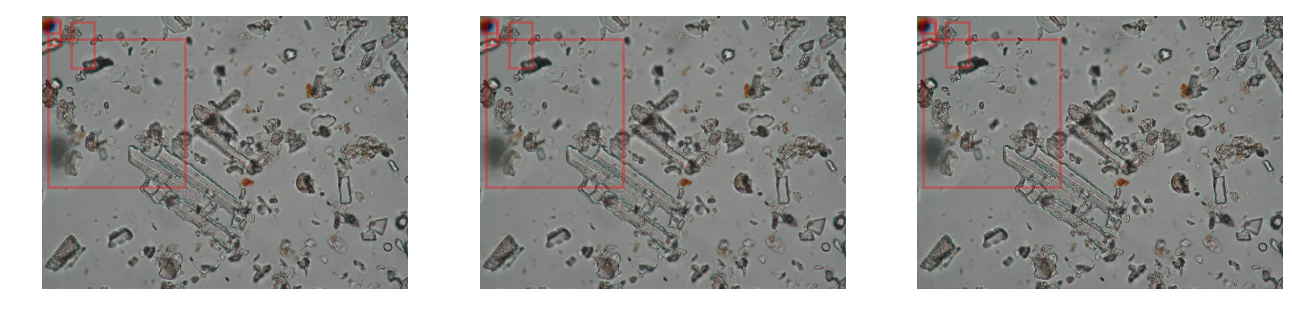

In [84]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(imgs[i])
    ax.axis('off')
    for coord in rescale_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 2. Espejar imágenes

In [85]:
flipped_imgs = []

# Damos la vuelta a la imagen en el eje vertical
flipped_imgs.append(np.flipud(original_img))

# Damos la vuelta a la imagen en el eje horizontal
flipped_imgs.append(np.fliplr(original_img))

In [86]:
def flipud_coords(img_h, img_w, coords):
    flipped_coords = []
    for coord in coords:
        
        height = coord[3] - coord[1]
        
        y2 = img_h - coord[1]
        y = y2 - height
        
        flipped_coords.append([coord[0],y,coord[2],y2])
    return flipped_coords

In [87]:
f_coords = flipud_coords(original_img.shape[0], original_img.shape[1], coords)

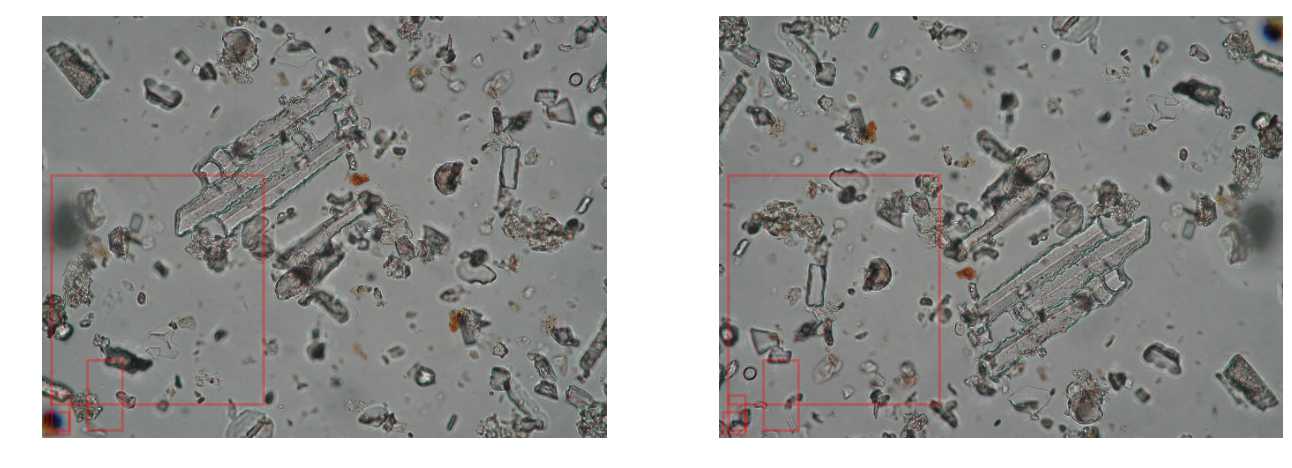

In [88]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=2, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(flipped_imgs[i])
    ax.axis('off')

    for coord in f_coords:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                  alpha=0.3, lw=2, facecolor='none'))
    i += 1